#### 2023-05-03

##### 1교시

In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression 

In [2]:
np.randomseed = 123
X = np.arange(-10,10)
y = 1+4*X+X**2+np.random.randn(20) 

In [5]:
# 다항회귀의 계수를 찾으면?
poly = PolynomialFeatures(degree=2)
poly_ftr = poly.fit_transform(X.reshape(-1,1))
lr = LinearRegression()
lr.fit(poly_ftr,y)

LinearRegression()

In [6]:
lr.coef_

array([0.        , 4.04822669, 0.99404675])

In [7]:
# MSE 에 루트를 쓰운것 = RMSE 
# 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것 = MAE
# 실제값의 분산 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울수록 예측 정확도가 높다. = R^2
# 실제값과 예측값의 차이를 제곱해 평균한것 = MSE

In [8]:
# 머신러닝에서 목적함수와 동의어라고 정의할 수 있는 함수를 모두 쓰시오. 
# 비용함수(cost function)
# 손실함수(loss function)
# 오차함수(error function)

In [9]:
# 회귀계수를 추정할 때 값이 커지지 않도록 ( 벌점:panalty )을 부여한다.

In [15]:
# 시그모이드 함수를 정의하시오
# 1/(1+e^(-x))
x = np.arange(-2,2,0.1)
y = 1/(1+np.exp(-x))

<Axes: >

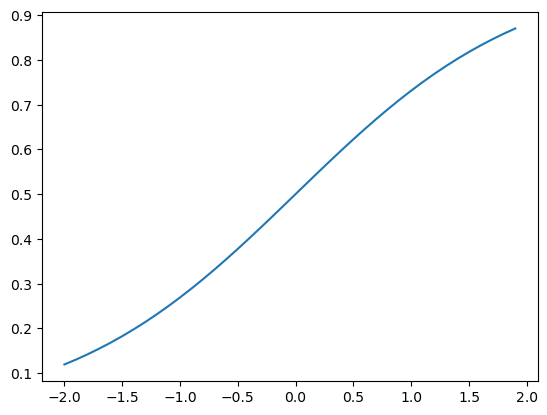

In [18]:
sns.lineplot(x=x,y=y)

##### 2교시

In [19]:
# 로지스틱회귀 ( 분류 해주는 회귀 모델 )

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler() 로 평균이 0, 분산이 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [25]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행
# solver 인자값을 생성자로 입력하지 않으면 solver = 'lbfgs'
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_auc 측정
print('accuracy: {0:3f}, roc_auc:{1:3f}'.format(accuracy_score(y_test,lr_preds), roc_auc_score(y_test, lr_preds)))

accuracy: 0.976608, roc_auc:0.971561


In [26]:
solvers = ['lbfgs','liblinear','newton-cg','sag','saga']

# 여러 개의 solver 값별로 LogisticRegression 학습 후 성능 평가
for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(X_train, y_train)
    lr_preds = lr_clf.predict(X_test)
    
    # accuracy와 roc_auc 측정
    print('solver:{0}, accuracy:{1:3f},roc_auc:{2:3f}'.format(solver, accuracy_score(y_test, lr_preds), roc_auc_score(y_test, lr_preds)))

solver:lbfgs, accuracy:0.976608,roc_auc:0.971561
solver:liblinear, accuracy:0.982456,roc_auc:0.979497
solver:newton-cg, accuracy:0.976608,roc_auc:0.971561
solver:sag, accuracy:0.982456,roc_auc:0.979497
solver:saga, accuracy:0.982456,roc_auc:0.979497


In [27]:
from sklearn.model_selection import GridSearchCV

params = {'solver':['liblinear','lbfgs'], 'penalty':['l2','l1'], 'C':[0.01,0.1,1,5,10]}

lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도:0.978910


/Users/sonsoohan/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sonsoohan/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sonsoohan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/sonsoohan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", l

##### 3교시

In [28]:
# 회귀 트리

In [107]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv(url, delim_whitespace=True, names=names) 
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [108]:
# MEDV 를 PRICE로 바꾸기
data = data.rename({'MEDV':'PRICE'}, axis = 1)

In [109]:
# 모든 칼럼을 소문자로 바꾸어 봅시다
data.columns = data.columns.str.lower()

In [110]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.3, random_state=0)
y_test

329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
       ... 
4      36.2
428    11.0
385     7.2
308    22.8
5      28.7
Name: price, Length: 152, dtype: float64

In [111]:
from sklearn.ensemble import RandomForestRegressor

In [112]:
rf_reg = RandomForestRegressor( random_state = 0, verbose = 1 )
rf_reg.fit(X_train, y_train)
pred = rf_reg.predict(X_test)
pred

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


array([23.867, 29.381, 22.052, 10.864, 20.443, 20.832, 21.147, 20.318,
       19.698, 18.227,  8.187, 14.564, 14.719,  9.178, 48.021, 33.775,
       21.115, 34.801, 26.315, 21.209, 23.672, 22.196, 19.291, 24.138,
       20.711, 18.046, 18.771, 15.757, 43.37 , 18.653, 15.02 , 17.473,
       20.158, 20.916, 22.825, 17.139,  8.6  , 29.492, 14.136, 14.72 ,
       22.65 , 20.889, 22.491, 15.935, 23.714, 22.467, 20.535, 16.436,
       14.705, 24.966, 16.239, 20.158, 20.505, 39.652, 15.039, 20.179,
       19.586, 18.583, 23.247, 19.918, 21.634, 21.283, 33.061, 29.661,
       18.855, 27.516, 16.031, 17.767, 17.912, 21.835, 20.188, 22.67 ,
       24.633, 30.946, 28.091,  9.282, 43.047, 21.893, 22.715, 19.506,
       26.811, 17.886, 22.856, 42.659, 42.028, 24.175, 23.319, 14.865,
       25.267, 16.265, 18.689, 13.031, 22.591, 30.288, 21.05 , 22.015,
       11.696, 23.336, 15.094, 18.976, 23.566, 19.98 , 28.457, 20.857,
       28.287, 20.593,  9.258, 18.991, 21.906, 23.103, 33.767, 12.978,
      

In [113]:
from sklearn.metrics import mean_squared_error

In [114]:
np.mean((pred - y_test)**2)
mean_squared_error(y_test, pred)

14.497125473684216

In [115]:
X_train[:1]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
141,1.62864,0.0,21.89,0,0.624,5.019,100.0,1.4394,4,437.0,21.2,396.9,34.41


In [116]:
# DecisionTree, XGboost, lightGBM 의 MSE를 비교해 봅시다

In [117]:
# XGBoost, LGBM 설치하기

In [118]:
conda install lightgbm

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [119]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [120]:
#모델 생성
dt_reg = DecisionTreeRegressor()
XGB_reg = XGBRegressor()
LGBM_reg = LGBMRegressor()

dt_reg.fit(X_train, y_train)
XGB_reg.fit(X_train, y_train)
LGBM_reg.fit(X_train, y_train)


pred_dt = dt_reg.predict(X_test)
pred_XGB = XGB_reg.predict(X_test)
pred_LGBM = LGBM_reg.predict(X_test)

dt_reg_acc = mean_squared_error(y_test, pred_dt) 
XGB_reg_acc = mean_squared_error(y_test, pred_XGB) 
LGBM_reg_acc = mean_squared_error(y_test, pred_LGBM) 

print(dt_reg_acc) 
print(XGB_reg_acc) 
print(LGBM_reg_acc) 

26.831776315789476
17.680459460938792
18.510691778258064


/Users/sonsoohan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [121]:
temp = pd.DataFrame({'feature':X_train.columns, 'importance':rf_reg.feature_importances_} )
temp.sort_values(by = 'importance', ascending = False)[:5]

,feature,importance
5,rm,0.420392
12,lstat,0.409189
7,dis,0.041786
0,crim,0.033169
10,ptratio,0.022329


##### 5교시 363p

In [183]:
# 자전거대여 수요예측

In [184]:
bike_df =  pd.read_csv("https://raw.githubusercontent.com/corazzon/KaggleStruggle/master/bike-sharing-demand/data/train.csv")

In [185]:
# 문자열을 datetime 타입으로 변경. 
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [186]:
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1,inplace=True)

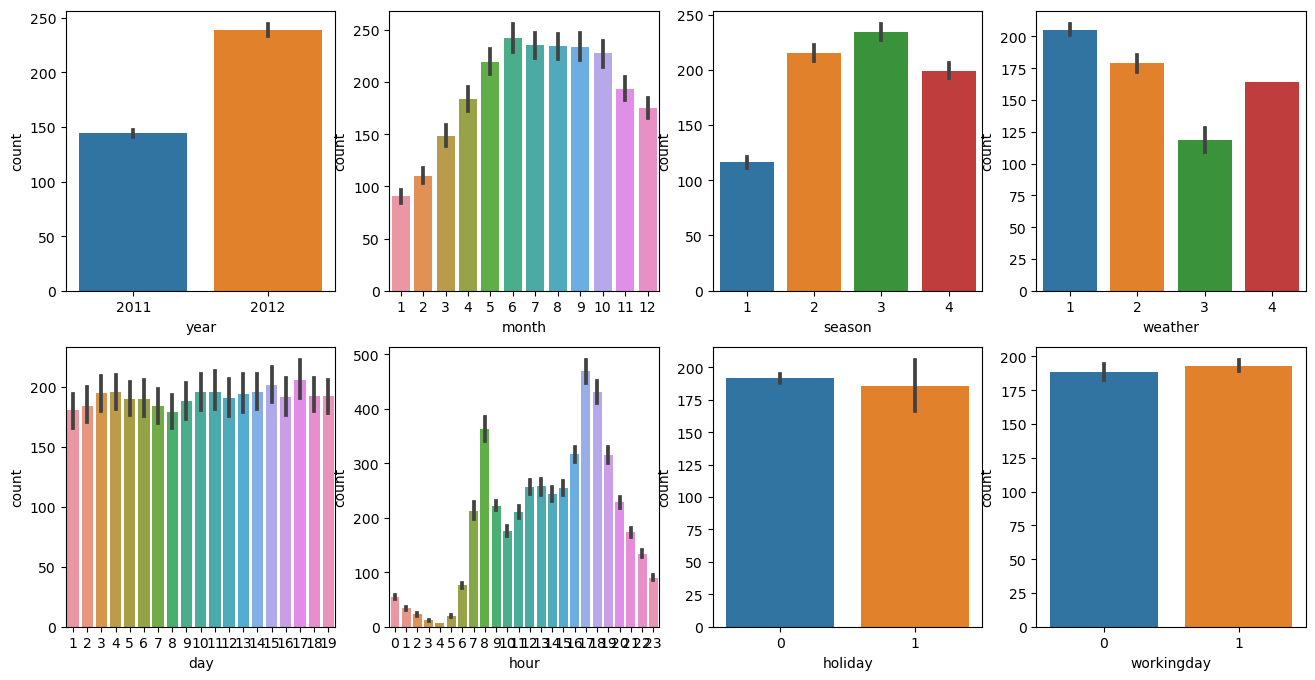

In [187]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
cat_features = ['year', 'month','season','weather','day', 'hour', 'holiday','workingday']
# cat_features에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
    # 시본의 barplot을 이용해 칼럼값에 따른 count의 합을 표현
    sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col])

In [188]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN등의 이슈로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE 를 모두 계산 
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

##### 6교시  368p

In [168]:
# 로그변환, 인코딩

In [189]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test ,pred)

RMSLE: 1.165, RMSE: 140.900, MAE: 105.924


In [191]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성. 
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력. 
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test,pred,n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


<Axes: >

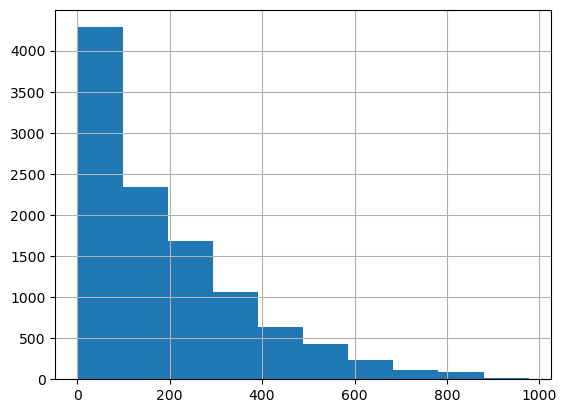

In [192]:
y_target.hist()

<Axes: >

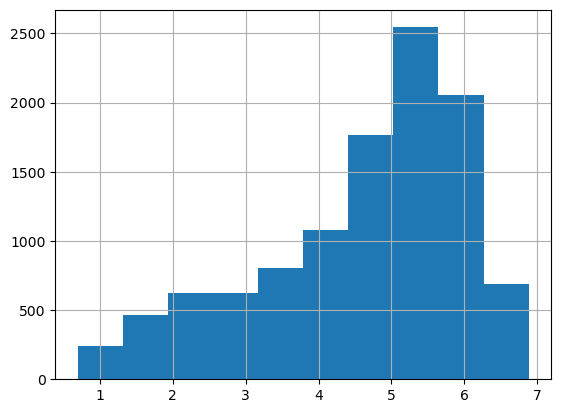

In [193]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [194]:
# 타깃 칼럼인 count 값을 log1p로 로그 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측 값 역시 Log 변환된 타깃 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp ,pred_exp)

RMSLE: 1.017, RMSE: 162.594, MAE: 109.286


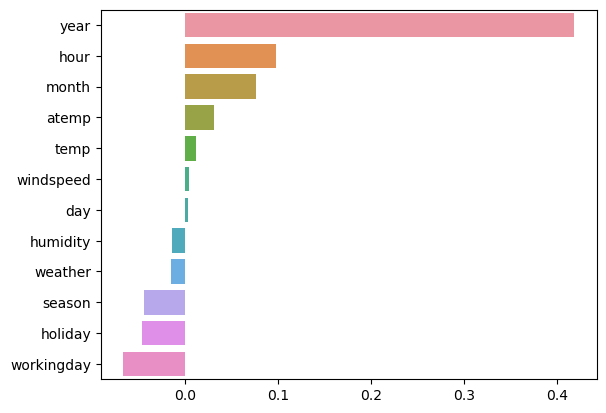

In [195]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)
plt.savefig('log_transform.tif', format='tif', dpi=300, bbox_inches='tight')

In [196]:
# 'year', month', 'day', hour'등의 피처들을 One Hot Encoding
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month','day', 'hour', 'holiday',
                                              'workingday','season','weather'])

In [197]:
# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할. 
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict    

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE: 0.590, RMSE: 97.691, MAE: 63.384
### Ridge ###
RMSLE: 0.590, RMSE: 98.529, MAE: 63.893
### Lasso ###
RMSLE: 0.635, RMSE: 113.219, MAE: 72.803


<Axes: >

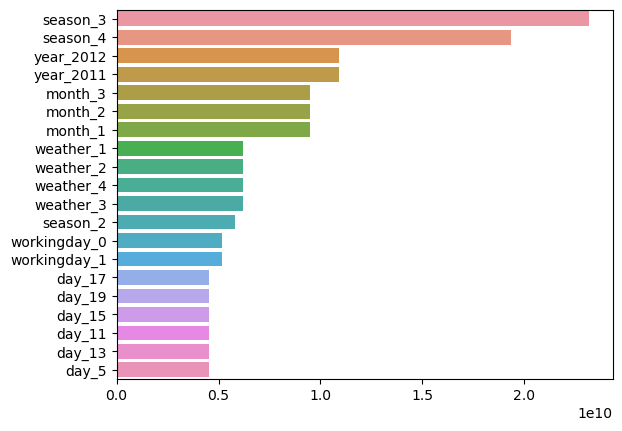

In [198]:
coef = pd.Series(lr_reg.coef_ , index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values , y=coef_sort.index)

In [199]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 DataFrame이 입력 될 경우 버전에 따라 오류 발생 가능. ndarray로 변환.
    get_model_predict(model,X_train.values, X_test.values, y_train.values, y_test.values,is_expm1=True)

### RandomForestRegressor ###
RMSLE: 0.355, RMSE: 50.521, MAE: 31.212
### GradientBoostingRegressor ###
RMSLE: 0.330, RMSE: 53.327, MAE: 32.732
### XGBRegressor ###
RMSLE: 0.342, RMSE: 51.732, MAE: 31.251
### LGBMRegressor ###
RMSLE: 0.319, RMSE: 47.215, MAE: 29.029


##### 7교시 (자습)

##### 8교시 (자습)